In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ode():
# dx/dt = g(x,t)
    def __init__(self, dt, x0, g, t0, tf):
# g = g(x, t) is a lambda function
# defining object ODE
        self.x0 = x0
        self.g = g
        self.x = []
        self.x.append(x0)
        self.t0=t0
        self.dt = dt
        self.tf = tf
# need a list for all ts tf is final t
        self.t_list = np.arange(self.t0, self.tf, self.dt)

    def rk4(self):
        for tn in self.t_list[:-1]:
# need a list/array for xs
            xn = np.array(self.x[-1])
            k1 = self.g(xn,tn)*self.dt
            k2 = self.g(xn+0.5*k1, tn+0.5*self.dt)*self.dt
            k3 = self.g(xn+0.5*k2,tn+0.5*self.dt)*self.dt
            k4 = self.g(xn+k3,tn+self.dt)*self.dt
            xnew = xn + (k1+2*k2+2*k3+k4)/6.0
            self.x.append(xnew.tolist())
            self.x_array = np.array(self.x)
            
            

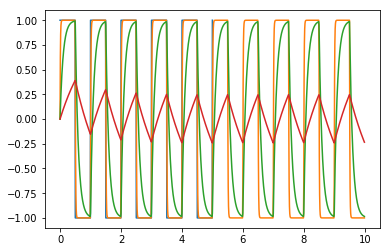

In [5]:
from scipy import signal 
import matplotlib.pyplot as plt
# voltage source  v_in is a lambda function

# Sampling rate 1000 hz / second
t = np.linspace(0, 5, 1000, endpoint=True)

 # Plot the square wave signal amp 1 freq 1

plt.plot(t, signal.square(2*np.pi*t))

v_in = lambda t : (signal.square(2*np.pi*t))


# 3 RC constants.
rc_1, rc_2, rc_3 = 0.01, 0.1, 1

# 3 g functions. 
#dt is chosen to be 0.05RC
g_001 = lambda x, t : (v_in(t)-x)/rc_1
g_01 = lambda x, t : (v_in(t)-x)/rc_2
g_1 = lambda x, t : (v_in(t)-x)/rc_3

# Defining classes parameters
#def __init__(self, dt, x0, g, t0, tf):
# total t = 10  x0=0   (g= g001 g01 g1) t0=0
ode_001 = ode(0.01, 0, g_001, 0,10 )
ode_001.rk4()
ode_01 = ode(0.01,0, g_01,0, 10 )
ode_01.rk4()
ode_1 = ode(0.01,0, g_1,0, 10 )
ode_1.rk4()
plt.plot(ode_001.t_list, ode_001.x_array)
plt.plot(ode_01.t_list, ode_01.x_array)
plt.plot(ode_1.t_list, ode_1.x_array)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class ode():
# dx/dt = g(x,t)
    def __init__(self, dt, x0, y0, gx, gy, t0, tf):
# g = g(x, t) is a lambda function
# defining object ODE
        self.x0 = x0
        self.y0 = y0
        self.gx = gx
        self.gy = gy
        self.y = []
        self.x = []
        self.x.append(x0)
        self.y.append(y0)
        self.t0=t0
        self.dt = dt
        self.tf = tf
# need a list for all ts tf is final t
        self.t_list = np.arange(self.t0, self.tf, self.dt)

    def rk42(self):
        for tn in self.t_list[:-1]:
# need a list/array for xs
            xn = np.array(self.x[-1])
            yn = np.array(self.y[-1])
            k1 = self.gx(xn,yn,tn)* self.dt
            l1 = self.gy(xn,yn,tn)*self.dt # left-hand slopes
            k2 = self.gx(xn+k1/2,yn+l1/2,tn+0.5*self.dt)*self.dt
            l2 = self.gy(xn+k1/2,yn+l1/2,tn+0.5*self.dt)*self.dt # 1st midpt slopes
            k3 = self.gx(xn+k2/2,yn+l2/2,tn+0.5*self.dt)*self.dt
            l3 = self.gy(xn+k2/2,yn+l2/2,tn+0.5*self.dt)*self.dt # 2nd midpt slopes
            k4 = self.gx(xn+k3,yn+l3,tn+0.5*self.dt)*self.dt
            l4 = self.gy(xn+k3,yn+l3,tn+0.5*self.dt)*self.dt # right-hand slopes
            xnew = xn + (k1+2*k2+2*k3+k4)/6.0
            ynew = yn + (l1+2*l2+2*l3+l4)/6.0
            self.x.append(xnew.tolist())
            self.x_array = np.array(self.x)
            self.y.append(ynew.tolist())
            self.y_array = np.array(self.y) 
 


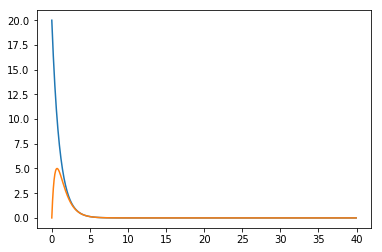

In [8]:
tau_a = 1
tau_b = 0.5
gx = lambda x,y, t : -x/tau_a
gy = lambda x, y, t : x/tau_a - y/tau_b
#def __init__(self, dt, x0, y0, gx, gy, t0, tf):
ode_x = ode(0.05, 20, 0, gx, gy, 0, 40 )
ode_x.rk42()
ode_y = ode(0.05, 20, 0, gx, gy, 0, 40)
ode_y.rk42()
plt.plot(ode_x.t_list, ode_x.x_array)
plt.plot(ode_y.t_list, ode_y.y_array)
